In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
x = np.linspace(0, 20, 100)
X = np.column_stack((np.ones(100), x))

In [3]:
#beta_ideal = [3, 2]
#y_ideal = np.dot(X, beta_ideal)   # also X @ beta_ideal
#y = y_ideal + 3*np.sin(x*5*np.sin(x*3))

In [4]:
y = (5*x**2 + 3*x + 7) #+ 200*np.sin(x*5)
Y = y.reshape((-1, 1))
beta = np.linalg.pinv(X) @ Y
y_pred = X @ beta

In [5]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[-322.96632997],
       [ 103.        ]])

In [6]:
np.linalg.pinv(X) @ Y

array([[-322.96632997],
       [ 103.        ]])

In [7]:
y2 = y/(x+0.1)
beta2 = np.linalg.pinv(X) @ y2.reshape((-1, 1))
y_pred2 = X @ beta2

In [8]:
y1d = np.diff(y)
beta1d = np.linalg.pinv(X[:99]) @ y1d.reshape((-1, 1))
y_pred1d = X[:99] @ beta1d

In [9]:
res = sm.OLS(y, X).fit()
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
print(res.summary())
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1529.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.35e-61
Time:                        02:39:55   Log-Likelihood:                -644.32
No. Observations:                 100   AIC:                             1293.
Df Residuals:                      98   BIC:                             1298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -322.9663     30.492    -10.592      0.0

In [10]:
res1d = sm.OLS(y1d, X[:99]).fit()
pred_ols1d = res1d.get_prediction()
print(res1d.summary())
print("Parameters: ", res1d.params)
print("Standard errors: ", res1d.bse)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.827e+29
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        02:39:55   Log-Likelihood:                 2761.7
No. Observations:                  99   AIC:                            -5519.
Df Residuals:                      97   BIC:                            -5514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8101   3.74e-14   2.16e+13      0.0

In [11]:
res2 = sm.OLS(y2, X).fit()
pred_ols2 = res2.get_prediction()
print(res2.summary())
print("Parameters: ", res2.params)
print("Standard errors: ", res2.bse)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1564.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           4.82e-62
Time:                        02:39:55   Log-Likelihood:                -331.12
No. Observations:                 100   AIC:                             666.2
Df Residuals:                      98   BIC:                             671.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2612      1.330      6.962      0.0

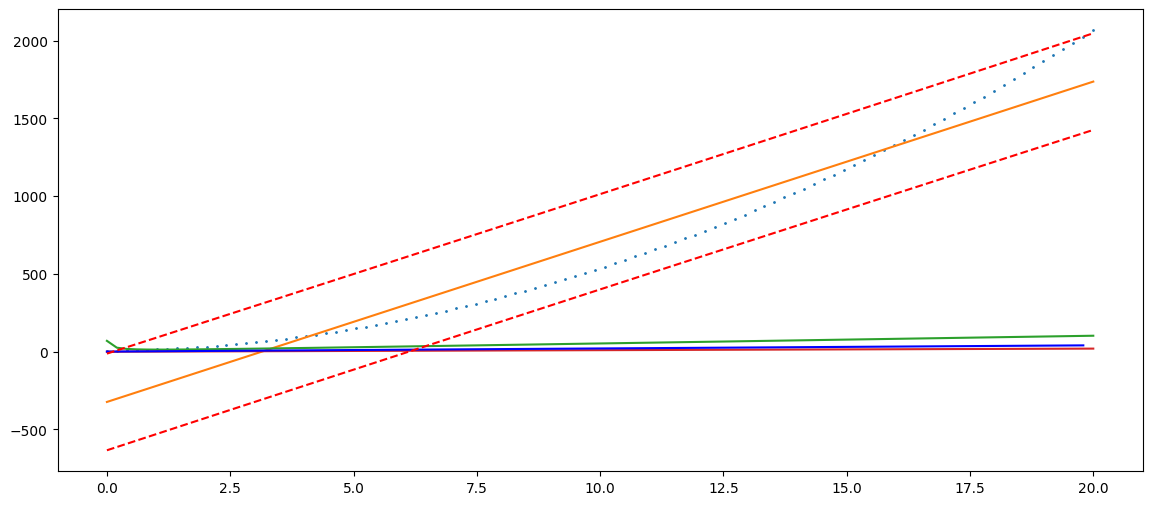

In [16]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(x, y, 'o', markersize=1)
ax.plot(x, y_pred)
ax.plot(x, y2)
ax.plot(x,x)
#ax.plot(x, y_pred2)
#ax.plot(x, res2.fittedvalues, "r--.", label="OLS")
ax.plot(x[:99], y1d, color = 'blue')
#ax.plot(x[:99], y_pred1d, color = 'black')
#ax.plot(x[:99], res1d.fittedvalues, "r--.", label="OLS")
#ax.plot(x, res.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")